In [140]:
import tensorflow as tf
import warnings
import numpy as np
import matplotlib.pyplot as plt
import logging
import tensorflow_datasets as tfds
logger = tf.get_logger()
warnings.filterwarnings('ignore')

In [141]:
%matplotlib inline
%config InlineBackend.figure_format= 'retina'

In [142]:
#loading training data

training_set, dataset_info = tfds.load('mnist', split='train', as_supervised=True, with_info=True)

In [143]:
#inspecting the data

num_classes= dataset_info.features['label'].num_classes
print('There are {:,} classes in our dataset'.format(num_classes))

There are 10 classes in our dataset


In [144]:
num_training_examples = dataset_info.splits['train'].num_examples
print('There as {:,} images in the trainng set'.format(num_training_examples))

There as 60,000 images in the trainng set


In [145]:
# iterate through the data set, grab one image, and inspect shape
for image, label in training_set.take(1):
    print('The images in the training set have:')
    print('2022 dtype:', image.dtype)
    print('2022 shape:', image.shape)
    
print('The labels of the images have:')
print('2022 dtype:', label.dtype)

The images in the training set have:
2022 dtype: <dtype: 'uint8'>
2022 shape: (28, 28, 1)
The labels of the images have:
2022 dtype: <dtype: 'int64'>


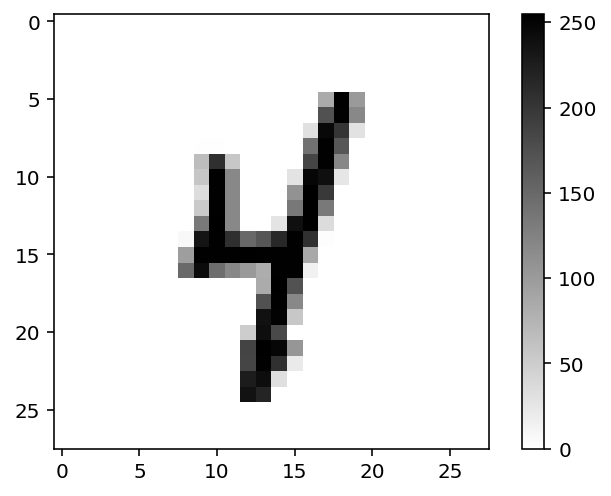

The label of this image is: 4


In [146]:
#plotting image

for image, label in training_set.take(1):
    image= image.numpy()
    label= label.numpy()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

In [147]:
# creating pipeline

def normalize(image, label):
    image= tf.cast(image, tf.float32)
    image /= 235
    return image, label

In [148]:
batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples).batch(batch_size).map(normalize).prefetch(1)

In [149]:
#inspect batches

for image_batch, label_batch in training_batches.take(1):
    print('The images in each batch have:')
    print('2022 dtype:', image_batch.dtype)
    print('2022 shape:', image_batch.shape)
    
    print('There are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have:
2022 dtype: <dtype: 'float32'>
2022 shape: (64, 28, 28, 1)
There are a total of 64 image labels in this batch:
[8 7 3 6 8 0 0 9 5 0 4 7 1 4 3 7 5 0 0 9 7 8 6 2 6 6 6 2 4 9 9 7 2 4 0 4 2
 7 5 4 7 6 7 8 5 2 6 7 3 4 0 2 4 0 1 6 1 1 8 7 1 9 6 8]


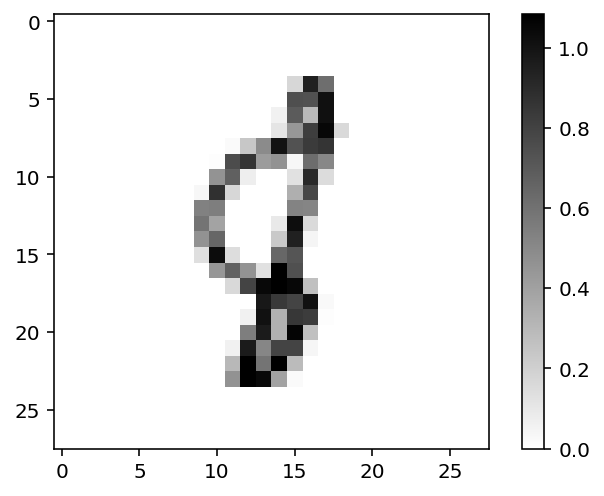

In [150]:
for images_batch, label_batch in training_batches.take(1):
    images= image_batch.numpy().squeeze()
    labels = label_batch.numpy()

plt.imshow(images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()


In [151]:
#Build activation funtion
def activation(x):
    """ Sigmoid activation function
    
        Arguments
        ---------
        x: tf.Tensor. Must be one of the following types: bfloat16, half, float32, float64, complex64, complex128.
    """
    return 1/(1+tf.exp(-x))

# Flatten the input images
inputs = tf.reshape(images, [images.shape[0], -1])

# Print the shape of the inputs. Should be (64,784)
print('The inputs have shape:', inputs.shape)

# Create Neural Network parameters
w1 = tf.random.normal((784,256))
b1 = tf.random.normal((1,256))

w2 = tf.random.normal((256,10))
b2 = tf.random.normal((1,10))

# Perform matrix multiplications for the hidden layer
# and apply activation function
h = activation(tf.matmul(inputs, w1) + b1)

# Perform matrix multiplication for the output layer
output = tf.matmul(h, w2) + b2

# Print the shape of the output. It should be (64,10)
print('The output has shape:', output.shape)

The inputs have shape: (64, 784)
The output has shape: (64, 10)


In [152]:
#distribution funtion
def softmax(x):
    """ Softmax function
    
        Arguments
        ---------
        x: tf.Tensor. Must be one of the following types: bfloat16, half, float32, float64, complex64, complex128.
    """
    
    return tf.exp(x) / tf.reduce_sum(tf.exp(x), axis = 1, keepdims = True)

# Apply softmax to the output
probabilities = softmax(output)

# Print the shape of the probabilities. Should be (64, 10).
print('The probabilities have shape:', probabilities.shape, '\n')


# The sum of probabilities for each of the 64 images should be 1
sum_all_prob = tf.reduce_sum(probabilities, axis = 1).numpy()

# Print the sum of the probabilities for each image.
for i, prob_sum in enumerate(sum_all_prob):
    print('Sum of probabilities for Image {}: {:.1f}'.format(i+1, prob_sum))

The probabilities have shape: (64, 10) 

Sum of probabilities for Image 1: 1.0
Sum of probabilities for Image 2: 1.0
Sum of probabilities for Image 3: 1.0
Sum of probabilities for Image 4: 1.0
Sum of probabilities for Image 5: 1.0
Sum of probabilities for Image 6: 1.0
Sum of probabilities for Image 7: 1.0
Sum of probabilities for Image 8: 1.0
Sum of probabilities for Image 9: 1.0
Sum of probabilities for Image 10: 1.0
Sum of probabilities for Image 11: 1.0
Sum of probabilities for Image 12: 1.0
Sum of probabilities for Image 13: 1.0
Sum of probabilities for Image 14: 1.0
Sum of probabilities for Image 15: 1.0
Sum of probabilities for Image 16: 1.0
Sum of probabilities for Image 17: 1.0
Sum of probabilities for Image 18: 1.0
Sum of probabilities for Image 19: 1.0
Sum of probabilities for Image 20: 1.0
Sum of probabilities for Image 21: 1.0
Sum of probabilities for Image 22: 1.0
Sum of probabilities for Image 23: 1.0
Sum of probabilities for Image 24: 1.0
Sum of probabilities for Image 2

In [153]:
#building the network using subclasses

class Network(tf.keras.Model):
    def __init__(self,num_classes=2):
        super().__init__()
        self.num_classes = num_classes
        
        
        #define layers
        self.input_layer= tf.keras.layers.Flatten()
        self.hidden_1= tf.keras.layers.Dense(256, activation='relu')
        self.hidden_2= tf.keras.layers.Dense(64, activation='relu')
        self.output_layer= tf.keras.layers.Dense(self.num_classes, activation='softmax')
        
        
        #define foward pass

    def call(self, input_tensor):
        x = self.input_layer(input_tensor)
        x = self.hidden_1(x)
        x = self.hidden_2(x)
        x = self.output_layer(x)
        return x

In [154]:
# set and inspect weights

for i, layer in enumerate(subclassed_model.layers):
    
    if len(layer.get_weights()) > 0:
        w = layer.get_weights()[0]
        b = layer.get_weights()[1]
        
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('\u2022 Weights:\n', w)
        print('\n\u2022 Biases:\n', b)
        print('\nThis layer has a total of {:,} weights and {:,} biases'.format(w.size, b.size))
        print('\n------------------------')
    
    else:
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('This layer has no weights or biases.')
        print('\n------------------------')


Layer 0: flatten_19

This layer has no weights or biases.

------------------------

Layer 1: dense_28

• Weights:
 [[ 0.00418565  0.02897047  0.00437111 ...  0.00373641  0.0504674
  -0.01762729]
 [ 0.02319095 -0.02965436 -0.07062613 ...  0.02121137 -0.00083572
  -0.03385629]
 [ 0.0214854  -0.0499554   0.01683199 ... -0.00728045 -0.0211654
  -0.0751259 ]
 ...
 [-0.05170315 -0.00353725 -0.05877193 ...  0.05921091  0.03865389
   0.01005983]
 [ 0.07045501  0.03893894 -0.00424652 ...  0.01946242 -0.06146042
   0.00616107]
 [ 0.07561602 -0.00627844 -0.04969488 ... -0.05598605  0.052984
   0.0225287 ]]

• Biases:
 [ 0.02025091 -0.02377988 -0.0158309   0.01257041  0.03351243  0.04143111
  0.06644227  0.03365055  0.055952    0.03731724 -0.02394217  0.06454157
 -0.00432473  0.06955194  0.00230315 -0.02612712 -0.0606559   0.05299965
 -0.01761252 -0.03728284  0.03419427  0.02640864 -0.0267383   0.00120209
 -0.0178412   0.00415813  0.08478214  0.00281248 -0.04917927  0.02462069
 -0.02306937 -0.04

In [155]:
#create model object

subclassed_model = Network(10)

#Build the model

subclassed_model.build((None, 28, 28, 1))



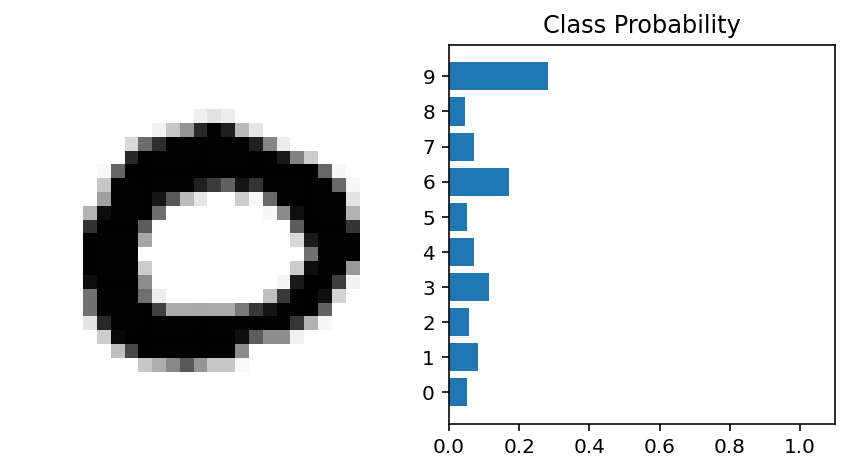

In [156]:
# make predicitons before training

for image_batch, label_batch in training_batches.take(1):
    ps = subclassed_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]


fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

In [157]:
w1 = subclassed_model.hidden_1.get_weights()[0]
b1 = subclassed_model.hidden_2.get_weights()[1]

print('\n\u2022 Weights:\n', w)
print('\n\u2022 Biases:\n', b)
print('\nThis layer has a total of {:,} weights and {:,} biases'.format(w1.size, b1.size))


• Weights:
 [[-4.64347005e-01  3.74556780e-01  4.81206961e-02 -3.04558426e-01
   2.20443845e-01  1.68159723e-01 -2.95232654e-01  1.56869188e-01
  -1.95739225e-01 -3.60594958e-01]
 [ 2.50700384e-01  2.51784742e-01 -2.19357952e-01 -1.30988926e-01
  -5.76383155e-03 -4.20631528e-01  1.22039780e-01  1.89444125e-01
  -6.45651519e-02  2.80683786e-01]
 [-1.61748484e-01 -3.84982467e-01  2.16701761e-01 -7.18261600e-02
   1.36059508e-01  8.92399326e-02 -3.05152863e-01  1.69353217e-01
  -3.28360200e-01  2.74060398e-01]
 [-3.77170175e-01  1.28586680e-01 -3.67991984e-01  4.60626893e-02
   2.31625229e-01  2.48862073e-01 -5.42430997e-01  9.96227041e-02
  -3.47514540e-01  2.07178965e-01]
 [ 1.62725851e-01  2.26715252e-01  9.79830325e-03  2.09528700e-01
  -3.00588548e-01  1.18671760e-01  2.82658905e-01 -2.64070362e-01
   2.03829259e-01  2.65984327e-01]
 [ 2.24153593e-01  2.71016449e-01 -1.52959883e-01  2.46598706e-01
   8.97589773e-02  2.10518330e-01 -2.11683631e-01 -2.64426798e-01
   6.71514794e-02 -2

In [158]:
#config model for training
subclassed_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [159]:
#taking a look at loss and accuracy before training

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = subclassed_model.evaluate(image_batch, label_batch)
print('Loss before training: {:,}'.format(loss))
print('accuracy before traiing: {:,}'.format(accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 2.3595 - accuracy: 0.1094
Loss before training: 2.3595497608184814
accuracy before traiing: 0.109375


In [160]:
#training the model

EPOCHS = 5

history = subclassed_model.fit(training_batches, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2398 - accuracy: 0.9303
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0945 - accuracy: 0.9706
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0458 - accuracy: 0.9853
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0339 - accuracy: 0.9890


In [161]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = subclassed_model.evaluate(image_batch, label_batch)
print('Loss before training: {:,}'.format(loss))
print('accuracy before traiing: {:,}'.format(accuracy))

2/2 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9844
Loss before training: 0.0225486159324646
accuracy before traiing: 0.984375


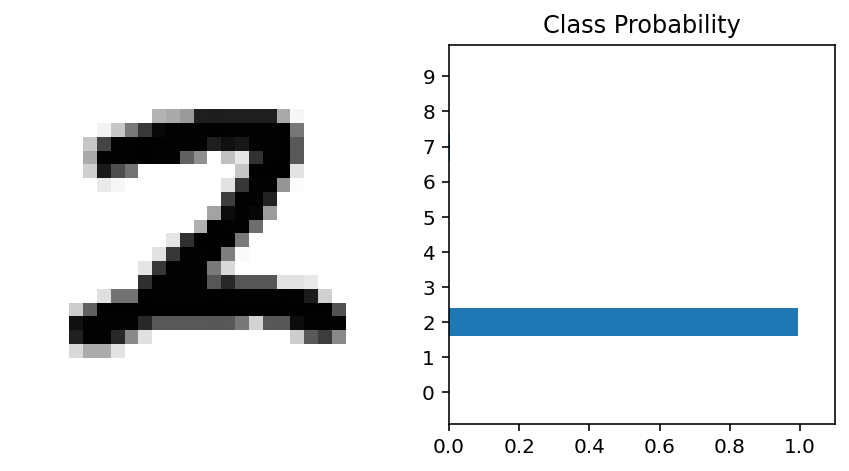

In [164]:
for image_batch, label_batch in training_batches.take(1):
    ps = subclassed_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]


fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()